In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

#### Data Explanation
#### ---------------------------
#### No Null values present in columns
#### Column: Explanation
##### fruit_label - Label given to each fruit name
##### fruit_name - name of the fruit, eg: Apple
##### fruit_subtype - sub type of fruit, eg: granny smith apple
##### mass - mass of the fruit
##### width - width of the fruit
##### height - height of the fruit
##### color_score - color_score of the fruit
#### ---------------------------

In [2]:
fruit_data=pd.read_table("data/fruit_data_with_colors.txt")

In [3]:
fruit_data.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


### Let us see if we have enough data for each fruit

In [4]:
fruit_data['fruit_name'].value_counts()

orange      19
apple       19
lemon       16
mandarin     5
Name: fruit_name, dtype: int64

#### We have very few Mandarin, but let us try it out

#### Let us visualize it a bit to get a better idea

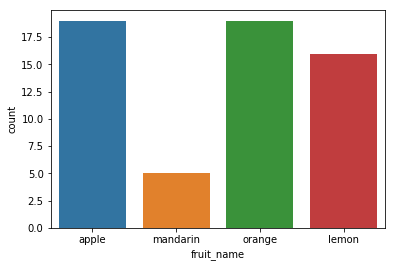

In [5]:
sns.countplot(x='fruit_name', data=fruit_data)

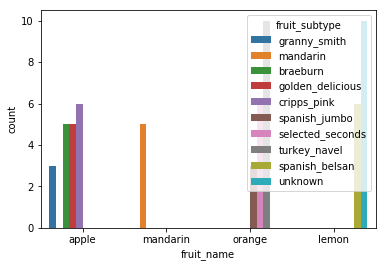

In [6]:
sns.countplot(x='fruit_name', hue='fruit_subtype', data=fruit_data)

#### Since it is mentioned that we do not columns with empty values, we can skip the null check. Let's check it to verify

In [7]:
fruit_data.columns[fruit_data.isnull().any()]

Index([], dtype='object')

#### As expected we do not have any columns with empty values

In [8]:
## Let us split target and features
## The Fruit Label is our target and mass, width, height, color_score are our features

In [9]:
y=fruit_data['fruit_label']
X=fruit_data[['mass','width', 'height', 'color_score']]

mass              AxesSubplot(0.125,0.536818;0.352273x0.343182)
width          AxesSubplot(0.547727,0.536818;0.352273x0.343182)
height               AxesSubplot(0.125,0.125;0.352273x0.343182)
color_score       AxesSubplot(0.547727,0.125;0.352273x0.343182)
dtype: object

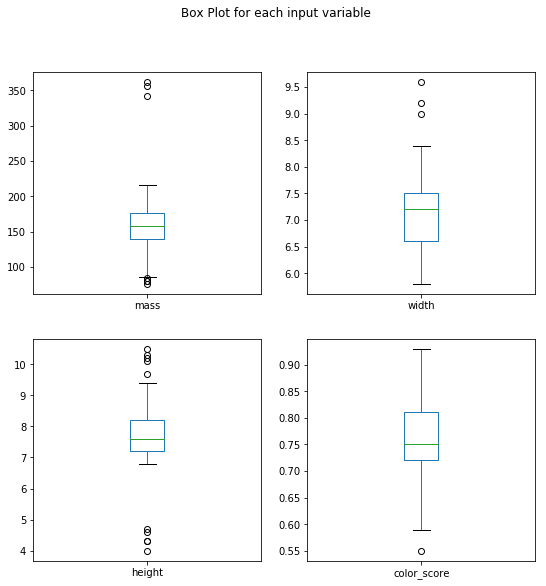

In [10]:
X.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False, figsize=(9,9), 
                                        title='Box Plot for each input variable')

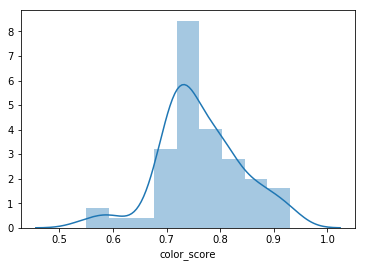

In [11]:
sns.distplot(X['color_score'])

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, random_state=10, test_size=0.2)

In [13]:
## Let us try scaling our features to see if that improves the accuracy
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
clf=DecisionTreeClassifier(min_samples_split=5)

In [15]:
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
accuracy_score(y_pred, y_test)

0.91666666666666663

In [16]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)

In [17]:
knn.fit(X_train, y_train)
y_pred=knn.predict(X_test)
accuracy_score(y_pred, y_test)

0.75

In [18]:
from sklearn.svm import SVC
svccf=SVC()

In [19]:
svccf.fit(X_train, y_train)
y_pred=svccf.predict(X_test)
accuracy_score(y_pred, y_test)

0.33333333333333331

In [20]:
parameters=[{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]
from sklearn.model_selection import GridSearchCV
gscv= GridSearchCV(svccf, parameters)

In [21]:
gscv.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'kernel': ['rbf'], 'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001]}, {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [23]:
gscv.best_estimator_.C, gscv.best_estimator_.kernel, gscv.best_estimator_.gamma

(100, 'linear', 'auto')

In [24]:
svccf=SVC(C=100, kernel='linear')
svccf.fit(X_train, y_train)
y_pred=svccf.predict(X_test)
accuracy_score(y_pred, y_test)

0.75

## A huge improvement compared to the default SVC